<a href="https://colab.research.google.com/github/phycoding/FakeNewsclassification/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Collection (Part1)

In [ ]:
#json file creation for auth purpose in kaggle

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"puspakmeher","key":"e2f03dea99a4e9f3b033c668045f12fa"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading the dataset using kaggle API
!kaggle competitions download -c fake-news

 71% 33.0M/46.5M [00:00<00:00, 101MB/s] 
100% 46.5M/46.5M [00:00<00:00, 123MB/s]


In [ ]:
#Creation of a new file and unzipping the zip file
!mkdir news
!unzip '/content/fake-news.zip' -d '/content/news'
!rm "/content/fake-news.zip"

Archive:  /content/fake-news.zip
  inflating: /content/news/submit.csv  
  inflating: /content/news/test.csv  
  inflating: /content/news/train.csv  


In [ ]:
#importing pandas dataframe and exploring the csv file
import pandas as pd
data = pd.read_csv("/content/news/train.csv")
data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
from collections import Counter
Counter(data.label)

Counter({0: 10387, 1: 10413})

In [ ]:
!kaggle datasets download -d sumanthvrao/fakenewsdataset

  0% 0.00/2.60M [00:00<?, ?B/s]
100% 2.60M/2.60M [00:00<00:00, 135MB/s]


In [ ]:
!unzip '/content/fakenewsdataset.zip' -d '/content/news'
!rm "/content/fakenewsdataset.zip"

Archive:  /content/fakenewsdataset.zip
  inflating: /content/news/Testing_dataset/testingSet/Catalog - Fake Articles.csv  
  inflating: /content/news/Testing_dataset/testingSet/Catalog - Real Articles.csv  
  inflating: /content/news/Testing_dataset/testingSet/exam.sh  
  inflating: /content/news/Testing_dataset/testingSet/fake/0.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/1.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/10.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/11.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/12.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/13.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/14.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/15.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/16.txt  
  inflating: /content/news/Testing_dataset/testingSet/fake/17.txt  
  inflating: /content/news/Testing_dataset/testingS

In [ ]:
!kaggle competitions download -c fakenewskdd2020
!unzip '/content/fakenewskdd2020.zip' -d '/content/news'
!rm "/content/fakenewskdd2020.zip"

 76% 7.00M/9.16M [00:00<00:00, 70.8MB/s]
100% 9.16M/9.16M [00:00<00:00, 85.2MB/s]
Archive:  /content/fakenewskdd2020.zip
  inflating: /content/news/sample_submission.csv  
replace /content/news/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: yy
  inflating: /content/news/yy        
replace /content/news/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: rr
  inflating: /content/news/rr        


#Dataset Preprocessing and Analysis (Part 2)

In [ ]:
train1 = pd.read_csv("/content/news/rr",sep='\t', encoding='utf-8')
train = pd.read_csv("/content/news/train.csv")
train.head(3)
train1.head(3)

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0


In [ ]:
train1.shape

(4987, 2)

In [ ]:
train1.label

0       1
1       1
2       0
3       0
4       0
       ..
4982    0
4983    0
4984    0
4985    0
4986    0
Name: label, Length: 4987, dtype: object

In [ ]:
y2 = []
count = 0
for i in train1.label:
  if i == '0':
    y2.append(0)
  else:
    y2.append(1)
  

In [ ]:
train1['label'] = y2

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4987 non-null   object
 1   label   4987 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.0+ KB


In [ ]:
import numpy as np
np.array(train1['label']).astype('str')

array(['1', '1', '0', ..., '0', '0', '0'], dtype='<U5')

In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
import glob

In [ ]:
train2 = pd.DataFrame(columns= ['text','label'])
path = "/content/news/overall/overall"
i = 0
file_list = glob.glob(path+"/fake/*.txt")
for filename in file_list:
  file = open(filename,'r',encoding='utf8')
  a = file.read()
  train2.loc[i] = [a,1]
  i = i+1
file_list = glob.glob(path+"/real/*.txt")
for filename in file_list:
  file = open(filename,'r',encoding='utf8')
  a = file.read()
  train2.loc[i] = [a,0]
  i = i+1

In [ ]:
train2.head()

,text,label
0,‘Breaking Bad’ Star Bryan Cranston Diagnosed W...,1
1,Federal Judge Sends Trump To The Corner\n\n\n\...,1
2,MILEY CYRUS DEAD AT THE AGE OF 24\nMILEY CYRUS...,1
3,Elon Musk Buys Fortnite And Deletes It\nElon M...,1
4,DEMI LOVATO TAKES AIM AT HER TEEN FANS ON 'THE...,1


In [ ]:
train2['label'][0]

1

In [ ]:
train0 = pd.DataFrame({'text':train['text'],'label':train['label']})
dataset = pd.concat([train0,train1,train2],axis= 0)

In [ ]:
dataset.describe()

,text,label
count,26328,26367
unique,25696,2
top,,0
freq,75,13649


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26367 entries, 0 to 579
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    26328 non-null  object
 1   label   26367 non-null  object
dtypes: object(2)
memory usage: 618.0+ KB


In [ ]:
dataset.isnull().sum()

text     39
label     0
dtype: int64

In [ ]:
dataset = dataset.dropna(subset = ['text'])
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# create a function to tokenize the data
def preprocess_data(data):
  
  # 1. Tokenization
  tk = RegexpTokenizer('\s+', gaps = True)
  text_data = [] # List for storing the tokenized data
  for values in data.text:
    tokenized_data = tk.tokenize(values) # Tokenize the news
    text_data.append(tokenized_data) # append the tokenized data
  
  # 2. Stopword Removal
  stop_words = stopwords.words('english')
  filtered_data = [] # List for storing the tokenized stop word less data
 
  for w in text_data:
    clean_text = [words.lower() for words in w if words.lower() not in stop_words]
    filtered_data.append(clean_text)
  # 3. Stemming

  # Create a stemmer object
  ps = PorterStemmer()
  stemmed_data = [] # List for storing the stemmed data
  for data in filtered_data:
    stemmed_text = [ps.stem(words) for words in data] # Stem the words
    stemmed_data.append(stemmed_text) # Append the stemmed text

  # tf-idf Vectorizer

  updated_data = []
  for data in stemmed_data:
    updated_data.append(" ".join(data))

  # TFID Vector object
  tfidf = TfidfVectorizer()
  tfidf_matrix = tfidf.fit_transform(updated_data)

  return tfidf_matrix


In [ ]:
preprocessed = preprocess_data(dataset)

Text(0.5, 1.0, 'Distribution of dataset')

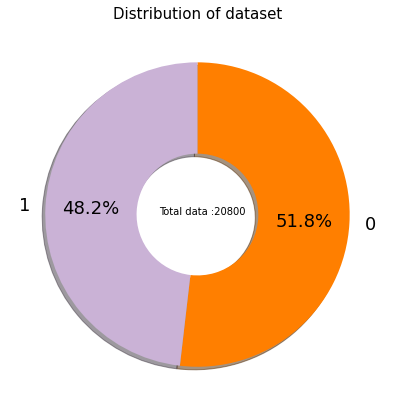

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(7,7))

value_count = dataset["label"].value_counts()


plt.pie(value_count, labels=value_count.index ,
        startangle = 90 ,counterclock =False, wedgeprops = {'width' : 0.6},
        autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 18}, 
        shadow = True,colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.25, y=0,s ="Total data :{}".format(train.shape[0]))
plt.title("Distribution of dataset",size=15)

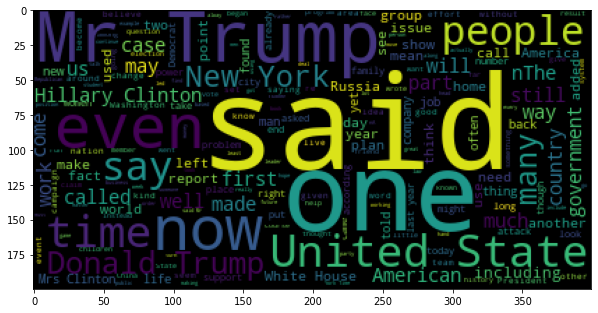

In [ ]:
# Visualization of text in word cloud.
from wordcloud import WordCloud

cloud = train.text.tolist()
cloud_st = " ".join(str(cloud))
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(str(cloud)))

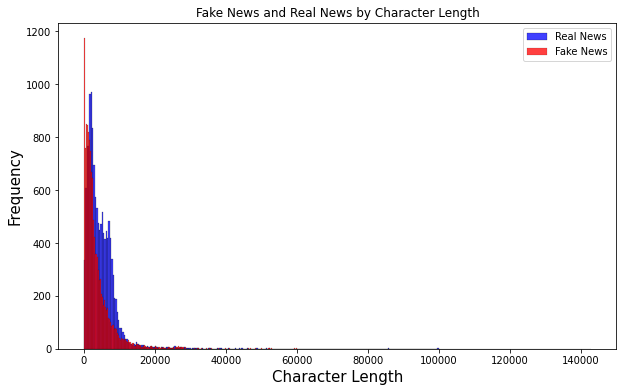

In [ ]:
plt.figure(figsize=(10,6))
import plotly.express as px
sns.histplot(dataset[dataset["label"]== 0]["text"].str.len(),label = "Real News", color = 'blue')
sns.histplot(dataset[dataset["label"]== 1]["text"].str.len(),label = 'Fake News', color = 'red')
plt.xlabel("Character Length",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Fake News and Real News by Character Length",size=12)
plt.legend(loc="best")
plt.show()

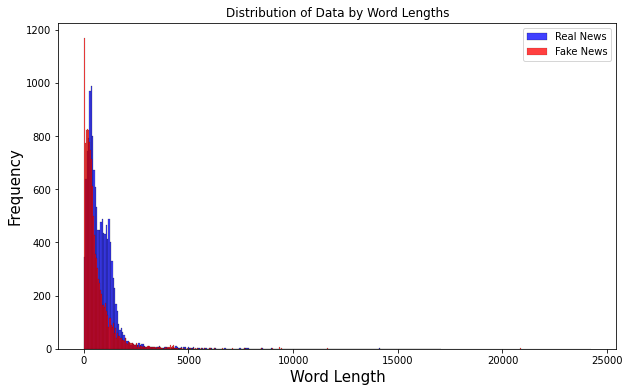

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(dataset[dataset["label"]==0]["text"].str.split().map(lambda x: len(x)),label="Real News",color="blue")
sns.histplot(dataset[dataset["label"]==1]["text"].str.split().map(lambda x: len(x)),label="Fake News",color="red")

plt.xlabel("Word Length",size =15)
plt.ylabel("Frequency",size=15)
plt.title("Distribution of Data by Word Lengths")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(preprocessed,dataset.label, test_size=0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21062, 196675)
(5266, 196675)
(21062,)
(5266,)


#Model Building (Part -3)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
def compute_metrics(x,y,model):
  y_pred = model.predict(x)
  acc = accuracy_score(y,y_pred)
  precision = round(precision_score(y, y_pred), 3)
  recall = round(recall_score(y, y_pred), 3)
  f1 = round(f1_score(y, y_pred), 3)
  metrics = pd.DataFrame(data = [[acc,precision,recall,f1]], index=[type(model).__name__], columns=['Accuracy','Presicion','Recall','F1'])
  return metrics

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Model object
lr_reg = LogisticRegressionCV(Cs=20, cv=3, random_state=42)

# fit the model
lr_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=20, cv=3, random_state=42)

In [ ]:
y_train = np.array(y_train).astype('int')
y_test = np.array(y_test).astype('int')

In [ ]:
compute_metrics(X_test,y_test,lr_reg)

,Accuracy,Presicion,Recall,F1
LogisticRegressionCV,0.902013,0.892,0.907,0.9


In [ ]:
#2. Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Model Object
mnb = MultinomialNB(alpha = 1.0e-10)

# Fit the object
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1e-10)

In [ ]:
compute_metrics(X_test,y_test,mnb)

,Accuracy,Presicion,Recall,F1
MultinomialNB,0.8327,0.881,0.757,0.814


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model Object
dt_clf = DecisionTreeClassifier()

# Fit the object
dt_clf.fit(X_train, y_train)
compute_metrics(X_test,y_test,dt_clf)

0.8156095708317509

In [ ]:
compute_metrics(X_test,y_test,dt_clf)

,Accuracy,Presicion,Recall,F1
DecisionTreeClassifier,0.81561,0.802,0.822,0.812


In [ ]:
from xgboost import XGBClassifier

# XGB model
xgb_model = XGBClassifier(n_estimators=200)

xgb_model.fit(X_train, y_train)
compute_metrics(X_test,y_test,xgb_model)

0.8820736802126852

In [ ]:
compute_metrics(X_test,y_test,xgb_model)

,Accuracy,Presicion,Recall,F1
XGBClassifier,0.882074,0.864,0.898,0.881


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [100,200],
    'n_estimators': [50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")
%time
grid_search.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 45.1 µs
Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=100, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
rf_best.fit(X_train,y_train)
compute_metrics(X_test,y_test,rf_best)

,Accuracy,Presicion,Recall,F1
RandomForestClassifier,0.744778,0.779,0.661,0.715


In [ ]:
emt = pd.DataFrame()

In [ ]:
clf = [rf_best,xgb_model,dt_clf,mnb,lr_reg]
for i in clf:
  df = compute_metrics(X_test,y_test,i)
  emt = emt.append(df)

In [ ]:
results = emt
results

,Accuracy,Presicion,Recall,F1
RandomForestClassifier,0.744778,0.779,0.661,0.715
XGBClassifier,0.882074,0.864,0.898,0.881
DecisionTreeClassifier,0.815610,0.802,0.822,0.812
MultinomialNB,0.832700,0.881,0.757,0.814
LogisticRegressionCV,0.902013,0.892,0.907,0.900


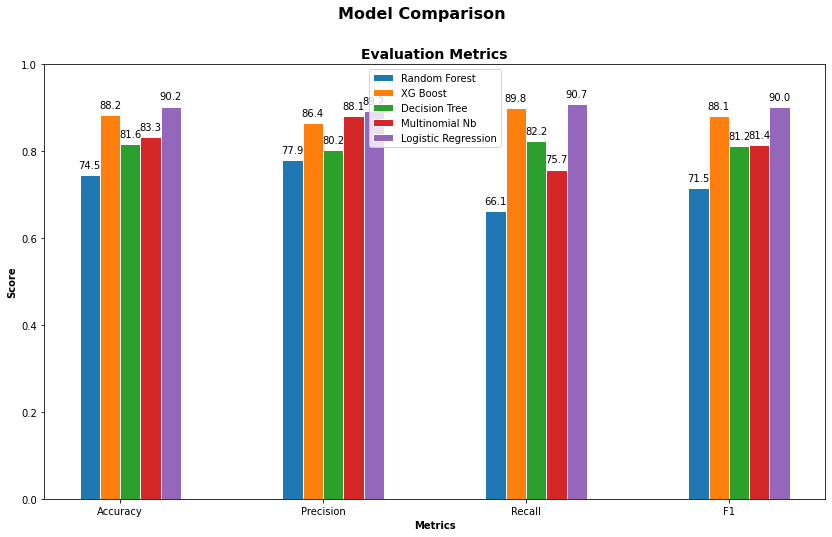

In [ ]:
#plotting performance of each model
import numpy as np
fig,ax1 = plt.subplots()

plt.rcParams["figure.figsize"] = (20,3)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(8)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
RandomForest_score = [results['Accuracy'][0],results['Presicion'][0],results['Recall'][0],results['F1'][0]]
XGB_score = [results['Accuracy'][1],results['Presicion'][1],results['Recall'][1],results['F1'][1]]
DTC_score = [results['Accuracy'][2],results['Presicion'][2],results['Recall'][2],results['F1'][2]]
MNB_score = [results['Accuracy'][3],results['Presicion'][3],results['Recall'][3],results['F1'][3]]
LR_score = [results['Accuracy'][4],results['Presicion'][4],results['Recall'][4],results['F1'][4]]
'''
Gaussian_score = [i*100 for i in Gaussian_score]
LR_score = [i*100 for i in LR_score]
DTC_score = [i*100 for i in DTC_score]
SVC_score = [i*100 for i in SVC_score]
NN_score = [i*100 for i in NN_score]
'''
## Set position of bar on X axis
r1 = np.arange(len(RandomForest_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, RandomForest_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r2, XGB_score, width=barWidth, edgecolor='white', label='XG Boost')
ax1.bar(r3, DTC_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r4, MNB_score, width=barWidth, edgecolor='white', label='Multinomial Nb')
ax1.bar(r5, LR_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(RandomForest_score))],)
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height()*100, '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
plt.show()